<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Bernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# **Y constante**

In [3]:
# y constante = 33 cm +/- 0.5

import uncertainties.unumpy as unp

h = unp.uarray([2.9, 4.9, 6.9, 9, 10.9], 0.5) * ureg.cm
xmax = unp.uarray([6.5, 12.7, 17.7, 20, 23.7], 0.5) * ureg.cm
x_2 = xmax**2

x_2_arr = np.array([i.n for i in x_2])
h_arr = np.array([i.n for i in h])

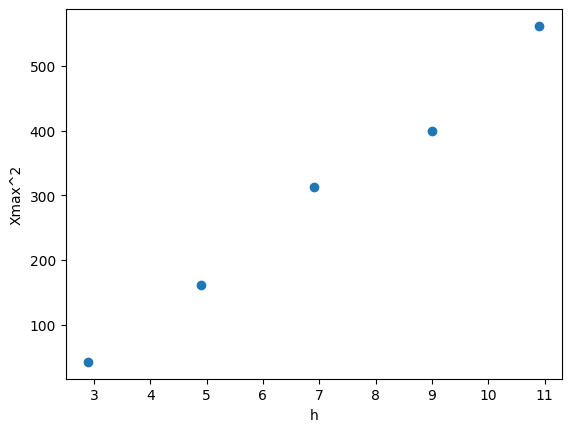

In [59]:
plt.scatter(h_arr, x_2_arr)
plt.xlabel('h')
plt.ylabel('Xmax^2')
plt.show()

In [20]:
def modelo(x,m,b):
  return x*m + b

from scipy.optimize import curve_fit

popt, pcov = curve_fit(modelo, h_arr, x_2_arr)
popt

y_xd = popt[0]/2

err_y_xd = np.sqrt(np.diag(pcov))[0]/2

y_chevere = ufloat(y_xd, err_y_xd) * ureg.cm
y_chevere


<Quantity(31.7463+/-1.6650, 'centimeter')>

In [39]:
# Z test

from scipy.special import erfc

Z = np.abs(33 - y_chevere.n)/y_chevere.s

P = erfc(Z/np.sqrt(2))*100
100 - np.round(P,2)

np.float64(54.85)

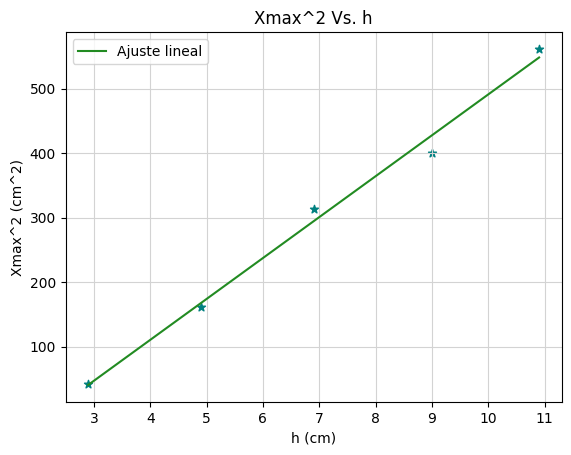

In [15]:
plt.scatter(h_arr, x_2_arr, marker = '*', c = 'teal')
plt.plot(h_arr, modelo(h_arr, *popt), c ='forestgreen', label = 'Ajuste lineal')
plt.title('Xmax^2 Vs. h')
plt.xlabel('h (cm)')
plt.ylabel('Xmax^2 (cm^2)')
plt.legend()
plt.grid(c="lightgrey")
plt.show()

# **h Constante**

In [45]:
h= 7 #cm
y= np.array([27.5, 37.9, 15.8, 20.8, 30.5, 22.5])
x_max= np.array([18.2, 22.1, 12, 14, 17.5, 15.3])
x_max= x_max**2

In [46]:
def ajuste_lineal(x, m, b):
    return m * x + b

popt, pcov = curve_fit(ajuste_lineal, y, x_max)

m_ajustada = popt[0]
b_ajustada = popt[1]

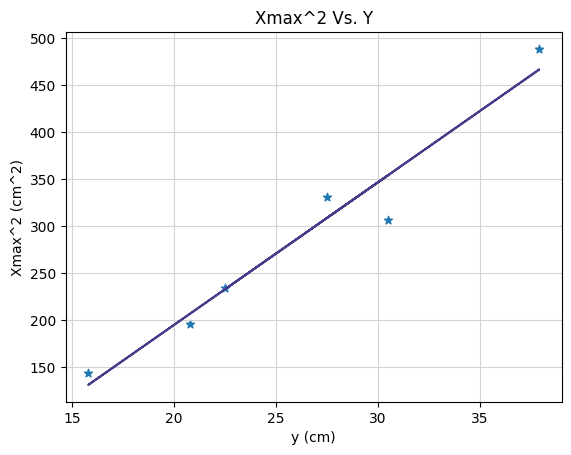

In [58]:
plt.scatter(y, x_max, marker= "*")
plt.plot(y, ajuste_lineal(y, m_ajustada, b_ajustada), c= "darkslateblue")
plt.title('Xmax^2 Vs. Y')
plt.xlabel('y (cm)')
plt.ylabel('Xmax^2 (cm^2)')
plt.grid(c="lightgrey")
plt.show()

In [54]:
error= np.sqrt(np.diag(pcov))

m_u = ufloat(m_ajustada, error[0])
m_u_dx = m_u/2
m_u_dx * ureg.cm

<Quantity(7.58784+/-0.85298, 'centimeter')>

In [56]:
Z2 = (7 - m_u_dx.n)/m_u_dx.s

P2 = erfc(Z2/np.sqrt(2))*100
np.round(P2,2) - 100

np.float64(50.93000000000001)